In [1]:
import re
import os
import csv

In [2]:
#With this loop we find the top 10 bookseries in order of appearence.

top_10_series=[]
for i in range(1,26544):
    if len(top_10_series)==10:
            break
    with open('articles/article_' + str(i) +'.tsv', 'r', encoding="utf-8") as file:
        temp = csv.DictReader(file, delimiter = '\t')
        for row in temp:
            bookseries=row["bookSeries"]
            if bookseries and not re.findall(r'(?<=#)[0-9]?[-–]{1}',bookseries):
                bookseries=bookseries.split("#")[0].strip()
                if bookseries not in top_10_series:
                    top_10_series.append(bookseries)
            

In [21]:
top_10_series

['The Hunger Games',
 'Harry Potter',
 'To Kill a Mockingbird',
 'The Twilight Saga',
 "The Hitchhiker's Guide to the Galaxy",
 'Robert Langdon',
 'Divergent',
 'The Mortal Instruments',
 "Ender's Saga",
 'Anne of Green Gables']

In [22]:
series_dict={}
for series in top_10_series:
    series_dict[series]=[]

In [23]:
series_dict

{'The Hunger Games': [],
 'Harry Potter': [],
 'To Kill a Mockingbird': [],
 'The Twilight Saga': [],
 "The Hitchhiker's Guide to the Galaxy": [],
 'Robert Langdon': [],
 'Divergent': [],
 'The Mortal Instruments': [],
 "Ender's Saga": [],
 'Anne of Green Gables': []}

In [24]:
for i in range(1,26544):
    with open('articles/article_' + str(i) +'.tsv', 'r', encoding="utf-8") as file:
        temp = csv.DictReader(file, delimiter = '\t')
        for row in temp:
            bookseries=row["bookSeries"]
            if bookseries and not re.findall(r'(?<=#)[0-9]?[-–]{1}',bookseries):
                bookseries=bookseries.split("#")[0].strip()
                if bookseries in series_dict:
                       series_dict[bookseries].append((row["bookTitle"],row["NumberOfPages"],row["Publishing_Date"].split()[-1]))

In [28]:
#Ordering the books in every series by date
for series in series_dict:
    series_dict[series].sort(key=lambda x:x[2])

[2008, 2009, 2010, 2020]
[374, 765, 1155, 1594]
[1997, 1998, 1999, 2000, 2003, 2005, 2007, 2008, 2016]
[309, 650, 1085, 1819, 2689, 3341, 4100, 4104, 4447]
[1960, 1960, 2015]
[309, 633, 911]
[2005, 2006, 2007, 2008, 2009, 2011, 2015, 2020]
[501, 1064, 1693, 2449, 2627, 3170, 3908, 4570]
[1979, 1980, 1982, 1984, 1992, 1996]
[193, 443, 667, 892, 1180, 1995]
[2000, 2003, 2009, 2013, 2017]
[736, 1225, 1734, 2197, 2653]
[2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2014, 2014, 2014]
[487, 537, 580, 1105, 1631, 1686, 3302, 3510, 3550, 3615, 3663]
[2007, 2008, 2009, 2011, 2012, 2014]
[485, 938, 1479, 1904, 2450, 3175]
[1985, 1986, 1991, 1996, 1999]
[324, 706, 1298, 1668, 1880]
[1908, 1909, 1915, 1917, 1919, 1921, 1936, 1939]
[320, 624, 867, 1094, 1319, 1596, 1884, 2158]


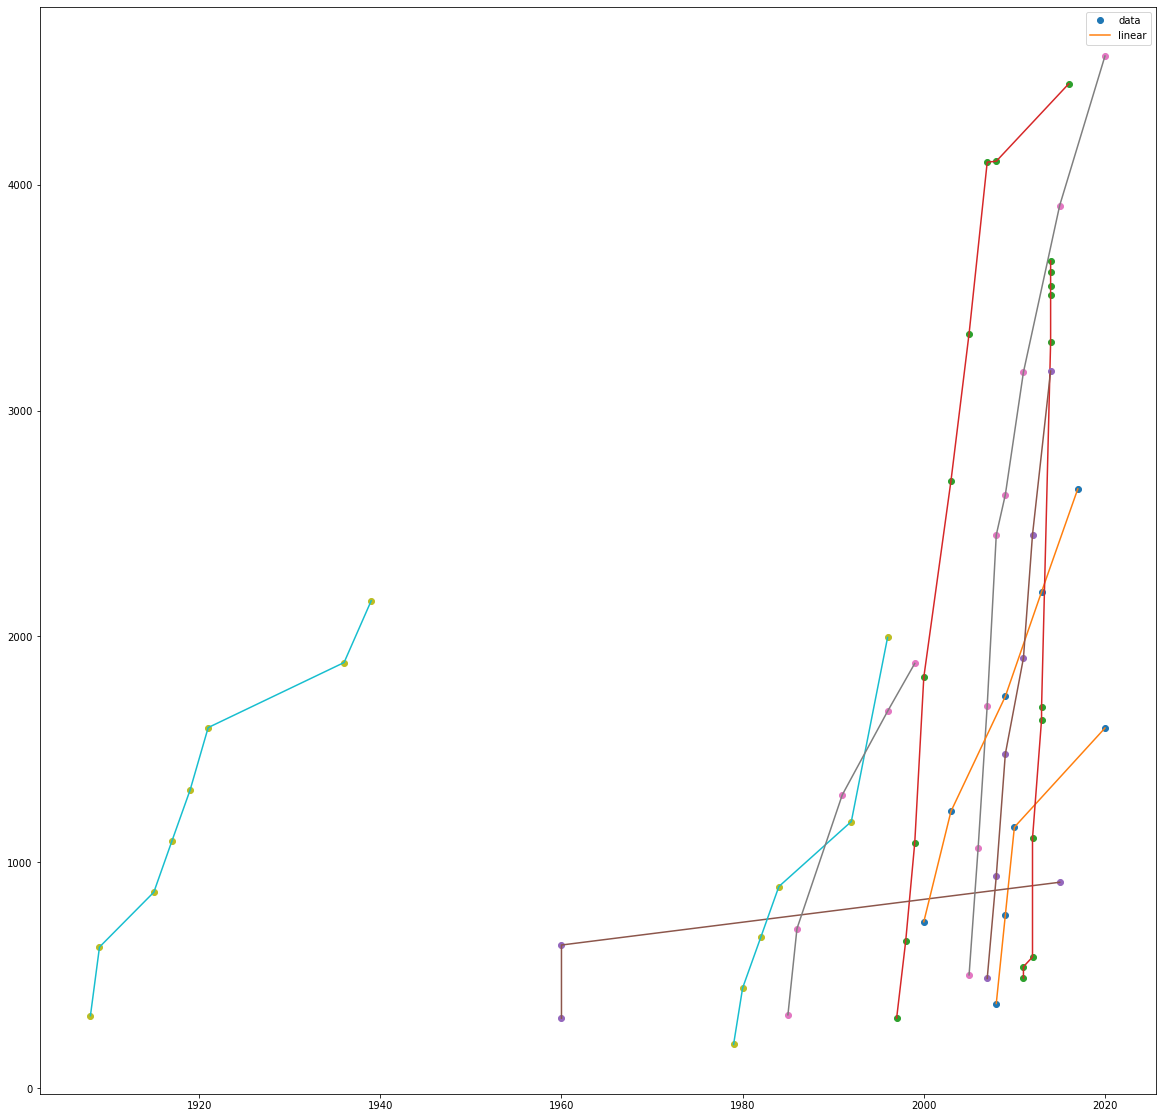

In [43]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for bookseries in series_dict:
    book_list=series_dict[bookseries]
    x=[]
    y=[]
    y_cum=0
    for book in book_list:
        x.append(int(book[2]))
        y_cum+=int(book[1])
        y.append(y_cum)
    print(x)
    print(y)
   
    plt.plot(x, y, 'o', x, y, '-')
    plt.legend(['data', 'linear'], loc='best')
plt.show()    
    

In [29]:
series_dict

{'The Hunger Games': [('The Hunger Games', '374', '2008'),
  ('Catching Fire', '391', '2009'),
  ('Mockingjay', '390', '2010'),
  ('The Ballad of Songbirds and Snakes', '439', '2020')],
 'Harry Potter': [("Harry Potter and the Sorcerer's Stone", '309', '1997'),
  ('Harry Potter and the Chamber of Secrets', '341', '1998'),
  ('Harry Potter and the Prisoner of Azkaban', '435', '1999'),
  ('Harry Potter and the Goblet of Fire', '734', '2000'),
  ('Harry Potter and the Order of the Phoenix', '870', '2003'),
  ('Harry Potter and the Half-Blood Prince', '652', '2005'),
  ('Harry Potter and the Deathly Hallows', '759', '2007'),
  ('Harry Potter: The Prequel', '4', '2008'),
  ('Harry Potter and the Cursed Child: Parts One and Two', '343', '2016')],
 'To Kill a Mockingbird': [('To Kill a Mockingbird', '309', '1960'),
  ('To Kill a Mockingbird', '324', '1960'),
  ('Go Set a Watchman', '278', '2015')],
 'The Twilight Saga': [('Twilight', '501', '2005'),
  ('New Moon', '563', '2006'),
  ('Eclipse'